In [75]:
from notebook import notebookapp as app
app.NotebookApp.iopub_data_rate_limit = 10000000.0

Retea sociala: ce fel de poze ai postat? (TEMA) Tocmai ti-ai inceput prima ta zi de munca ca si software developer la Facebook in echipa care se ocupa cu partea de continut a platformei. Echipa de analisti a observat ca foarte multe persoane folosesc filtre peste pozele lor, asadar in speranta de a promova continut mai putin editat, si poze cat mai reale, doresc sa implementeze o noua functionalite in care sa arate utilizatorilor daca o poza a fost sau nu editata. Pentru a testa aceasta idee, si pentru a vedea daca utlizatorilor li s-ar parea folositoare o astfel de functionalitate, au decis sa testeze ideea pe pozele care au filtre sepia. Primul task al tau este sa implementezi un algoritm de clasificare a pozelor care sa ne spuna daca o poza are sau nu adaugat filtru sepia. Team leaderul echipei de ML iti propune urmatorul plan de lucru

 1. devoltarea, antrenarea si testarea unui clasificator bazat pe retele neuronale folosind date mai simple, de tip caracteristici numerice - de ex datele cu irisi) - lucky you! Go to DEMO! 🍀

In [76]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import neural_network
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

In [77]:
def loadIrisData():
  data = load_iris()
  inputs = data['data']
  outputs = data['target']
  outputNames = data['target_names']
  featureNames = list(data['feature_names'])
  feature1 = [feat[featureNames.index('sepal length (cm)')] for feat in inputs]
  feature2 = [feat[featureNames.index('petal length (cm)')] for feat in inputs]
  inputs = [[feat[featureNames.index('sepal length (cm)')], feat[featureNames.index('petal length (cm)')]] for feat in inputs]
  return inputs, outputs, outputNames

inData, outData, featNames = loadIrisData()
print("feature names: ", featNames)
print("some input examples: ", inData[0], inData[50], inData[-5])
print("corrsponding labels: ", outData[0], outData[50], outData[-5])

feature names:  ['setosa' 'versicolor' 'virginica']
some input examples:  [5.1, 1.4] [7.0, 4.7] [6.7, 5.2]
corrsponding labels:  0 1 2


In [78]:
inputs, outputs, outputNames = loadIrisData()

In [79]:
def splitData(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  testSample = [i for i in indexes if not i in trainSample]

  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]
  testInputs = [inputs[i] for i in testSample]
  testOutputs = [outputs[i] for i in testSample]

  return trainInputs, trainOutputs, testInputs, testOutputs

In [80]:
def normalisation(trainData, testData):
  scaler = StandardScaler()
  if not isinstance(trainData[0], list):
    trainData = [[d] for d in trainData]
    testData = [[d] for d in testData]

    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)

    normalisedTrainData = [el[0] for el in normalisedTrainData]
    normalisedTestData = [el[0] for el in normalisedTestData]
  else:
    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)
  return normalisedTrainData, normalisedTestData

In [81]:
def data2FeaturesMoreClasses(inputs, outputs):
  labels = set(outputs)
  noData = len(inputs)
  for crtLabel in labels:
    x = [inputs[i][0] for i in range(noData) if outputs[i] == crtLabel]
    y = [inputs[i][1] for i in range(noData) if outputs[i] == crtLabel]
    plt.scatter(x, y, label = outputNames[crtLabel])
  plt.xlabel('feat1')
  plt.ylabel('feat2')
  plt.legend()
  plt.show()

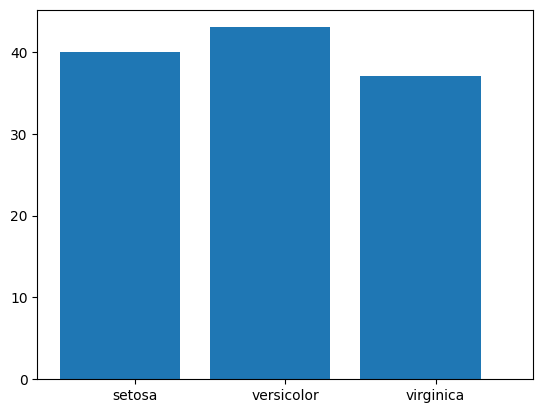

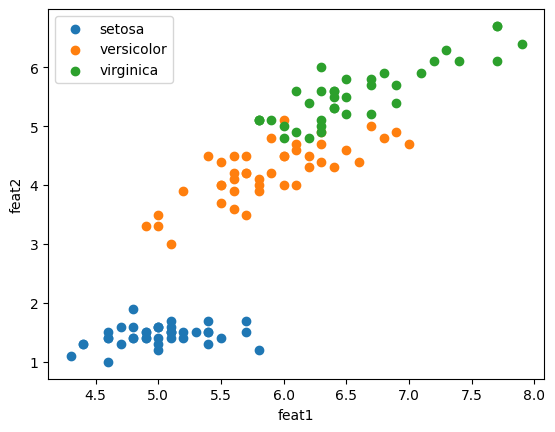

In [82]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, width = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins) + bin_w / 2, max(bins), bin_w), outputNames)
plt.show()

data2FeaturesMoreClasses(trainInputs, trainOutputs)

trainInputs, testInputs = normalisation(trainInputs, testInputs)

In [83]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

classifier.fit(trainInputs, trainOutputs)

Iteration 1, loss = 0.89050498
Iteration 2, loss = 0.79020695
Iteration 3, loss = 0.70261682
Iteration 4, loss = 0.63795055
Iteration 5, loss = 0.59294737
Iteration 6, loss = 0.55980303
Iteration 7, loss = 0.53299519
Iteration 8, loss = 0.50913765
Iteration 9, loss = 0.48668042
Iteration 10, loss = 0.46438364
Iteration 11, loss = 0.44226943
Iteration 12, loss = 0.42161313
Iteration 13, loss = 0.40252943
Iteration 14, loss = 0.38534053
Iteration 15, loss = 0.37002397
Iteration 16, loss = 0.35631526
Iteration 17, loss = 0.34377371
Iteration 18, loss = 0.33211015
Iteration 19, loss = 0.32117627
Iteration 20, loss = 0.31100910
Iteration 21, loss = 0.30165144
Iteration 22, loss = 0.29309232
Iteration 23, loss = 0.28528781
Iteration 24, loss = 0.27814662
Iteration 25, loss = 0.27156702
Iteration 26, loss = 0.26545860
Iteration 27, loss = 0.25974428
Iteration 28, loss = 0.25437110
Iteration 29, loss = 0.24930393
Iteration 30, loss = 0.24408987
Iteration 31, loss = 0.23811077
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

In [84]:
predictedLabels = classifier.predict(testInputs)

In [85]:
def plotConfusionMatrix(cm, classNames, title):
  classes = classNames
  plt.figure()
  plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
  plt.title('Confusion Matrix ' + title)
  plt.colorbar()
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)

  text_format = 'd'
  thresh = cm.max() / 2.
  for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(column, row, format(cm[row, column], text_format),
             horizontalalignment = 'center',
             color = 'white' if cm[row, column] > thresh else 'black')

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

  plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
  confMatrix = confusion_matrix(realLabels, computedLabels)
  acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
  precision = {}
  recall = {}
  for i in range(len(labelNames)):
    precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
    recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
  return acc, precision, recall, confMatrix

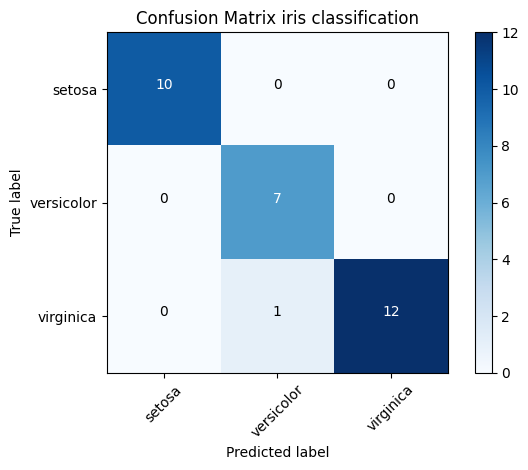

acc:  0.9666666666666667
precision:  {'setosa': 1.0, 'versicolor': 0.875, 'virginica': 1.0}
recall:  {'setosa': 1.0, 'versicolor': 1.0, 'virginica': 0.9230769230769231}


In [86]:
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)
plotConfusionMatrix(cm, outputNames, 'iris classification')

print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

2. devoltarea, antrenarea si testarea unui clasificator bazat pe retele neuronale folosind date mai complexe, de tip imagine - de ex baza de date cu cifre, pentru fiecare exmplu considerandu-se matricea de pixeli) - lucky you! Go to DEMO! 🍀

In [87]:
from sklearn.datasets import load_digits

In [88]:
def loadDigitData():
  data = load_digits()
  inputs = data.images
  outputs = data['target']
  outputNames = data['target_names']

  noData = len(inputs)
  permutation = np.random.permutation(noData)
  inputs = inputs[permutation]
  outputs = outputs[permutation]

  return inputs, outputs, outputNames

inputs, outputs, outputNames = loadDigitData()
print('out names: ', outputNames)
print('ins: ', inputs[:5])
print('outs: ', outputs[:5])

out names:  [0 1 2 3 4 5 6 7 8 9]
ins:  [[[ 0.  0.  0.  3. 15. 10.  1.  0.]
  [ 0.  0.  0. 11. 10. 16.  4.  0.]
  [ 0.  0.  0. 12.  1. 15.  6.  0.]
  [ 0.  0.  0.  3.  4. 15.  4.  0.]
  [ 0.  0.  0.  6. 15.  6.  0.  0.]
  [ 0.  4. 15. 16.  9.  0.  0.  0.]
  [ 0.  0. 13. 16. 15.  9.  3.  0.]
  [ 0.  0.  0.  4.  9. 14.  7.  0.]]

 [[ 0.  0.  3. 15. 13.  2.  0.  0.]
  [ 0.  0. 10. 16. 12. 13.  0.  0.]
  [ 0.  0. 13. 13.  9. 14.  0.  0.]
  [ 0.  0.  6. 15. 15. 11.  0.  0.]
  [ 0.  0.  4. 16. 14.  1.  0.  0.]
  [ 0.  0. 11. 14. 15.  5.  0.  0.]
  [ 0.  0.  9. 10. 14.  9.  0.  0.]
  [ 0.  0.  4. 16. 15.  2.  0.  0.]]

 [[ 0.  4. 15. 14. 11.  2.  0.  0.]
  [ 0.  7. 10.  1. 11. 11.  0.  0.]
  [ 0.  1. 13.  4. 13. 16.  2.  0.]
  [ 0.  0.  3. 11.  7.  9.  6.  0.]
  [ 0.  0.  0.  0.  0.  5.  8.  0.]
  [ 0.  0.  0.  0.  0.  5.  8.  0.]
  [ 0.  3. 12.  0.  3. 13.  5.  0.]
  [ 0.  2. 13. 16. 16.  8.  0.  0.]]

 [[ 0.  0.  1.  9. 16. 16. 16.  1.]
  [ 0.  0.  8. 15. 10. 14. 13.  0.]
  [ 0.  0. 14.  6.

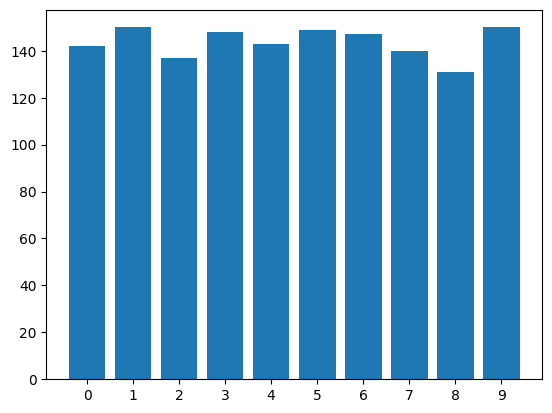

In [89]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins) + bin_w / 2, max(bins), bin_w), outputNames)
plt.show()

def flatten(mat):
  x = []
  for line in mat:
    for el in line:
      x.append(el)
  return x

trainInputsFlatten = [flatten(el) for el in trainInputs]
testInputsFlatten = [flatten(el) for el in testInputs]
trainInputsNormalised, testInputsNormalised = normalisation(trainInputsFlatten, testInputsFlatten)

Iteration 1, loss = 2.27810622
Iteration 2, loss = 1.54692777
Iteration 3, loss = 1.05670217
Iteration 4, loss = 0.77847832
Iteration 5, loss = 0.60717452
Iteration 6, loss = 0.47901016
Iteration 7, loss = 0.40583374
Iteration 8, loss = 0.36827667
Iteration 9, loss = 0.32538813
Iteration 10, loss = 0.30243395
Iteration 11, loss = 0.27884433
Iteration 12, loss = 0.25800418
Iteration 13, loss = 0.24334742
Iteration 14, loss = 0.22764030
Iteration 15, loss = 0.21440147
Iteration 16, loss = 0.20150454
Iteration 17, loss = 0.19222273
Iteration 18, loss = 0.18401795
Iteration 19, loss = 0.17212980
Iteration 20, loss = 0.16978750
Iteration 21, loss = 0.16947651
Iteration 22, loss = 0.15838433
Iteration 23, loss = 0.15174972
Iteration 24, loss = 0.14801898
Iteration 25, loss = 0.14762747
Iteration 26, loss = 0.14132400
Iteration 27, loss = 0.13818281
Iteration 28, loss = 0.12827350
Iteration 29, loss = 0.12406738
Iteration 30, loss = 0.12202021
Iteration 31, loss = 0.11743061
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


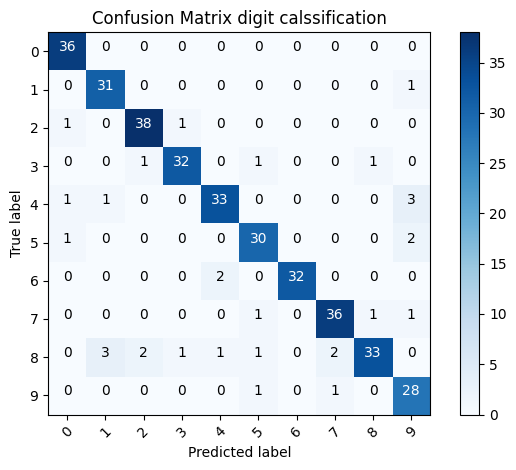

acc:  0.9138888888888889
precision:  {0: 0.9230769230769231, 1: 0.8857142857142857, 2: 0.926829268292683, 3: 0.9411764705882353, 4: 0.9166666666666666, 5: 0.8823529411764706, 6: 1.0, 7: 0.9230769230769231, 8: 0.9428571428571428, 9: 0.8}
recall:  {0: 1.0, 1: 0.96875, 2: 0.95, 3: 0.9142857142857143, 4: 0.868421052631579, 5: 0.9090909090909091, 6: 0.9411764705882353, 7: 0.9230769230769231, 8: 0.7674418604651163, 9: 0.9333333333333333}


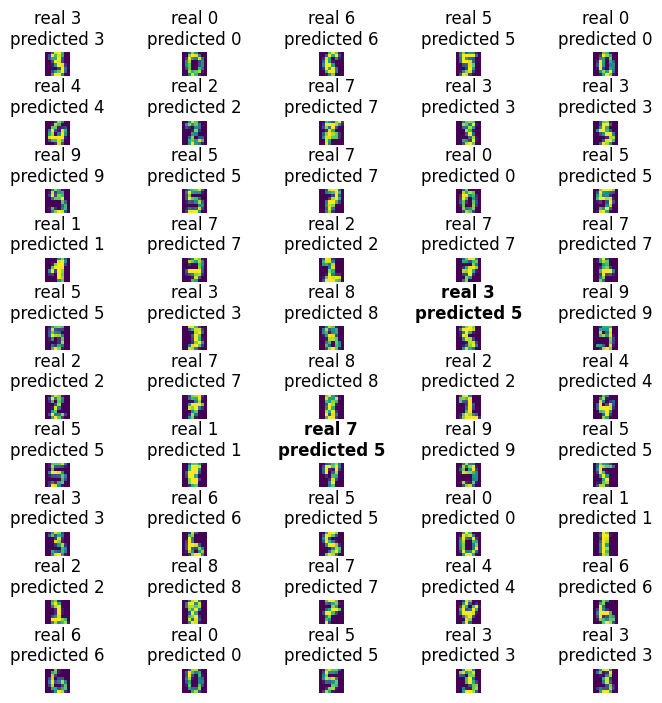

In [90]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

classifier.fit(trainInputsNormalised, trainOutputs)

predictedLabels = classifier.predict(testInputsNormalised)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)

plotConfusionMatrix(cm, outputNames, "digit calssification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

n = 10
m = 5
fig, axes = plt.subplots(n , m, figsize = (7, 7))
fig.tight_layout()
for i in range(0, n):
  for j in range(0, m):
    axes[i][j].imshow(testInputs[m * i + j])
    if (testOutputs[m * i + j] == predictedLabels[m * i + j]):
      font = 'normal'
    else:
      font = 'bold'
    axes[i][j].set_title('real ' + str(testOutputs[m * i + j]) + '\npredicted ' + str(predictedLabels[m * i + j]), fontweight=font)
    axes[i][j].set_axis_off()

plt.show()

3. crearea unei baze cu imagini (cu si fara filtru sepia) si etichetele corespunzatoare - Let’s get down to business! 🚀

In [91]:
from PIL import Image
import os
import random

In [92]:
def loadImages(folderPath):
  images = []
  for filename in os.listdir(folderPath):
    imgPath = os.path.join(folderPath, filename)
    image = Image.open(imgPath)
    imageArray = np.array(image)
    images.append(imageArray)
  return images

In [93]:
def filterSepia(img):
  img = img.astype(float)
  sepiaFilter = np.array([[0.393, 0.769, 0.189],
                          [0.349, 0.686, 0.168],
                          [0.272, 0.534, 0.131]])
  sepiaImg = img @ sepiaFilter.T
  sepiaImg = np.clip(sepiaImg, 0, 255)
  return sepiaImg.astype(np.uint8)

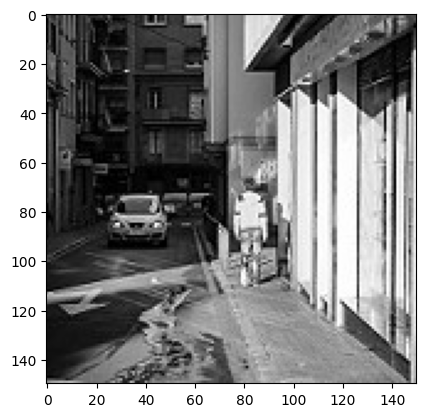

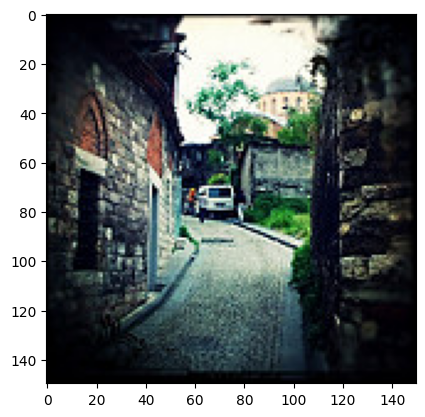

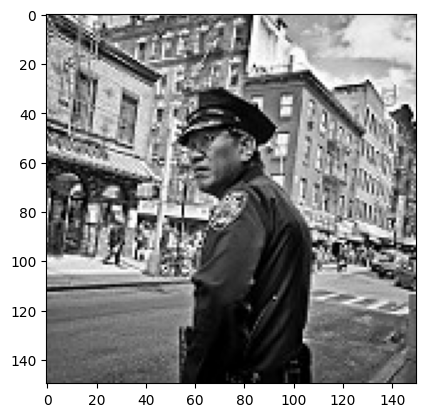

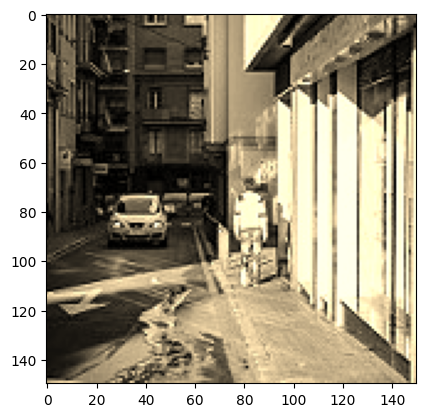

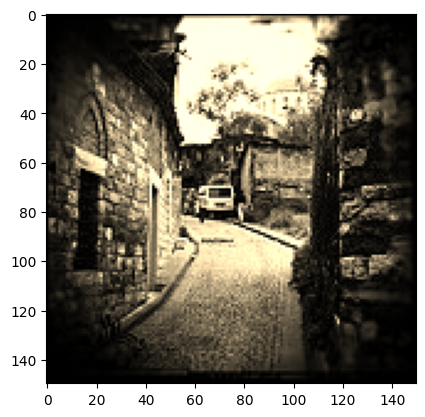

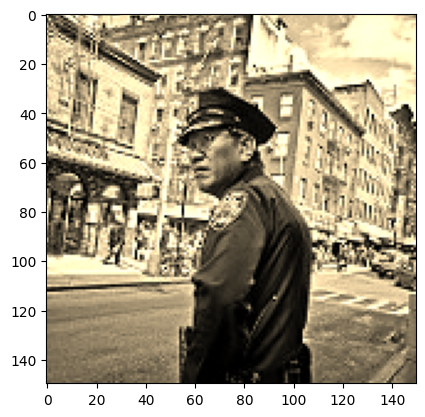

In [94]:
inputs = loadImages('images')
for img in inputs[:3]:
  #print(img.shape)
  plt.imshow(img)
  plt.show()

for img in inputs[:3]:
  img = filterSepia(img)
  plt.imshow(img)
  plt.show()

In [95]:
np.random.seed(0)
outputs = [random.choice([0, 1]) for _ in range(len(inputs))]
print(outputs)

[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0]


[[[117 104  81]
  [ 82  73  57]
  [ 48  43  33]
  ...
  [110  98  76]
  [112  99  77]
  [104  92  72]]

 [[ 77  68  53]
  [ 95  85  66]
  [ 67  60  46]
  ...
  [ 85  75  59]
  [ 97  86  67]
  [ 98  87  68]]

 [[  2   2   1]
  [131 116  90]
  [ 85  75  59]
  ...
  [ 79  70  55]
  [ 83  74  58]
  [112  99  77]]

 ...

 [[  4   3   2]
  [  0   0   0]
  [  4   3   2]
  ...
  [110  98  76]
  [255 255 209]
  [244 217 169]]

 [[ 99  89  69]
  [ 95  85  66]
  [ 94  84  65]
  ...
  [102  91  71]
  [255 255 199]
  [224 199 155]]

 [[189 168 131]
  [202 180 140]
  [217 193 150]
  ...
  [133 119  92]
  [255 251 195]
  [225 200 156]]]


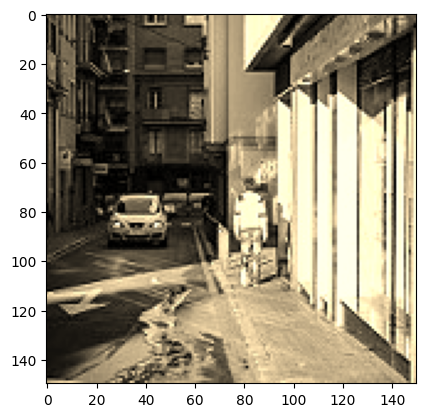

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


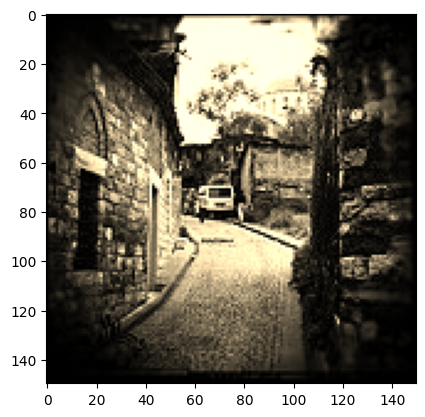

[[[207 207 207]
  [  0   0   0]
  [ 74  74  74]
  ...
  [143 143 143]
  [162 162 162]
  [112 112 112]]

 [[186 186 186]
  [ 50  50  50]
  [ 37  37  37]
  ...
  [149 149 149]
  [137 137 137]
  [112 112 112]]

 [[ 48  48  48]
  [216 216 216]
  [ 79  79  79]
  ...
  [166 166 166]
  [168 168 168]
  [171 171 171]]

 ...

 [[ 86  86  86]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 77  77  77]
  [ 73  73  73]
  [ 64  64  64]]

 [[ 91  91  91]
  [ 84  84  84]
  [ 84  84  84]
  ...
  [ 70  70  70]
  [ 69  69  69]
  [ 68  68  68]]

 [[ 79  79  79]
  [ 74  74  74]
  [ 89  89  89]
  ...
  [ 67  67  67]
  [ 67  67  67]
  [ 71  71  71]]]


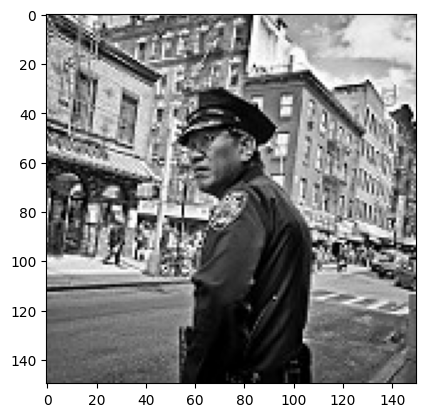

In [96]:
for i in range(len(inputs)):
  if outputs[i] == 1:
    inputs[i] = (filterSepia(inputs[i]))

for img in inputs[:3]:
  print(img)
  plt.imshow(img)
  plt.show()

In [97]:
def flattenImage(img):
  x = []
  for mat in img:
    for row in mat:
      for el in row:
        x.append(el)
  return x

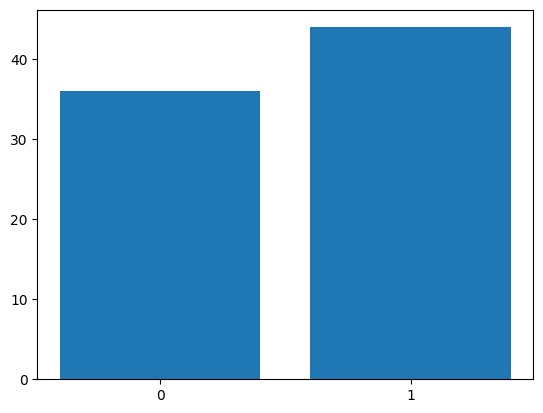

In [98]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

bins = range(3)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), [0, 1])
plt.show()

trainInputsNormalised = np.array([np.array(flattenImage(el)) / 255.0 for el in trainInputs])
testInputsNormalised = np.array([np.array(flattenImage(el)) / 255.0 for el in testInputs])

scaler = StandardScaler()

trainInputsScaled = scaler.fit_transform(trainInputsNormalised)
testInputsScaled = scaler.transform(testInputsNormalised)

4. antrenarea si testarea clasificatorului (bazat pe retele neuronale artificiale – tool sau ANN-ul dezvoltat) pentru clasificarea imaginilor cu si fara filtru - It's time to hustle!

In [99]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
  return x * (1 - x)

def binary_cross_entropy(y_true, y_pred):
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class MyAnn:
  def __init__(self, layers, learning_rate=0.1):
    self.layers = layers
    self.learning_rate = learning_rate
    self.weights = []
    self.biases = []
    for i in range(len(layers) - 1):
      self.weights.append(np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2. / layers[i]))
      self.biases.append(np.random.randn(layers[i + 1]))

  def feedforward(self, X):
    activation = X
    activations = [X]
    zs = []
    for i in range(len(self.weights)):
      z = np.dot(activation, self.weights[i]) + self.biases[i]
      zs.append(z)
      activation = sigmoid(z)
      activations.append(activation)
    return activations, zs

  def backprop(self, X, y):
    activations, zs = self.feedforward(X)
    delta = (activations[-1] - y) * sigmoid_deriv(activations[-1])
    for i in reversed(range(len(self.weights))):
      self.weights[i] -= self.learning_rate * np.dot(activations[i].T, delta)
      self.biases[i] -= self.learning_rate * np.sum(delta, axis=0)
      if i > 0:
        delta = np.dot(delta, self.weights[i].T) * sigmoid_deriv(activations[i])

  def train(self, X, y, epochs):
    for epoch in range(epochs):
      self.backprop(X, y)
      loss = binary_cross_entropy(y, self.feedforward(X)[0][-1])
      print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

  def predict(self, X):
    final_activation, _ = self.feedforward(X)
    return (final_activation[-1] > 0.5).astype(int)

In [100]:
class MyCnn:
  def __init__(self, kernel_size=3, pool_size=2, learning_rate=0.01):
    self.kernel_size = kernel_size
    self.pool_size = pool_size
    self.learning_rate = learning_rate
    self.kernels = [np.random.randn(kernel_size, kernel_size) for _ in range(3)]
    self.weights = np.random.randn(74*74, 1)
    self.bias = np.random.randn(1)

  def convolve2d(self, image):
    output = np.zeros((image.shape[0] - self.kernel_size + 1,
                       image.shape[1] - self.kernel_size + 1))
    for channel in range(3):
      for i in range(output.shape[0]):
        for j in range(output.shape[1]):
          output[i, j] += np.sum(image[i : i+self.kernel_size, j : j+self.kernel_size, channel] * self.kernels[channel])
    return output

  def relu(self, x):
    return np.maximum(0, x)

  def pool(self, image):
    output_dim = int(image.shape[0] / self.pool_size)
    output = np.zeros((output_dim, output_dim))
    for i in range(output_dim):
      for j in range(output_dim):
        output[i, j] = np.max(image[i*self.pool_size : (i+1)*self.pool_size, j*self.pool_size : (j+1)*self.pool_size])
    return output

  def flatten(self, image):
    return image.flatten()

  def fully_connected(self, x):
    return np.dot(x, self.weights) + self.bias

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def train(self, images, labels, epochs):
    for epoch in range(epochs):
      total_loss = 0
      for i in range(len(images)):
        conv_out = self.convolve2d(images[i])
        activated = self.relu(conv_out)
        pooled = self.pool(activated)
        flattened = self.flatten(pooled)
        fc_out = self.fully_connected(flattened)
        predicted = self.sigmoid(fc_out)

        error = predicted - labels[i]
        self.weights -= self.learning_rate * error * flattened[:, np.newaxis]
        self.bias -= self.learning_rate * error

        loss = -labels[i] * np.log(predicted) - (1 - labels[i]) * np.log(1 - predicted)
        total_loss += loss

      average_loss = total_loss / len(images)
      print(f"Epoch {epoch + 1}, Average Loss: {average_loss}")

  def predict(self, images):
    predicts = []
    for i in range(len(images)):
      conv_out = self.convolve2d(image=images[i])
      activated = self.relu(conv_out)
      pooled = self.pool(activated)
      flattened = self.flatten(pooled)
      fc_out = self.fully_connected(flattened)
      predicted = self.sigmoid(fc_out)
      if predicted > 0.5:
        predicts.append(1)
      else:
        predicts.append(0)
    return predicts

In [101]:
print('ANN with Tool: ')
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='tanh', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

ANN with Tool: 
Iteration 1, loss = 0.70140918
Iteration 2, loss = 0.20816531
Iteration 3, loss = 0.11934941
Iteration 4, loss = 0.06987667
Iteration 5, loss = 0.05505065
Iteration 6, loss = 0.04462949
Iteration 7, loss = 0.03954001
Iteration 8, loss = 0.03602364
Iteration 9, loss = 0.03371538
Iteration 10, loss = 0.03169460
Iteration 11, loss = 0.02965304
Iteration 12, loss = 0.02778631
Iteration 13, loss = 0.02660968
Iteration 14, loss = 0.02563867
Iteration 15, loss = 0.02474081
Iteration 16, loss = 0.02389902
Iteration 17, loss = 0.02310060
Iteration 18, loss = 0.02236715
Iteration 19, loss = 0.02171987
Iteration 20, loss = 0.02111772
Iteration 21, loss = 0.02051982
Iteration 22, loss = 0.01986549
Iteration 23, loss = 0.01896778
Iteration 24, loss = 0.01800153
Iteration 25, loss = 0.01733823
Iteration 26, loss = 0.01674856
Iteration 27, loss = 0.01622619
Iteration 28, loss = 0.01569510
Iteration 29, loss = 0.01502758
Iteration 30, loss = 0.01423329
Iteration 31, loss = 0.01362926
I

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate_init=0.01, max_iter=100, random_state=1,
              solver='sgd', verbose=10)

In [102]:
print('ANN without Tool: ')
myAnnClassifier = MyAnn([150*150*3, 100, 50, 1])

trainOutputs = np.asarray(trainOutputs)
trainOutputs = trainOutputs.reshape(-1, 1)
myAnnClassifier.train(trainInputsScaled, trainOutputs, epochs=30)

ANN without Tool: 
Epoch 1, Loss: 1.3009
Epoch 2, Loss: 0.4646
Epoch 3, Loss: 0.4678
Epoch 4, Loss: 1.2284
Epoch 5, Loss: 1.5337
Epoch 6, Loss: 0.7182
Epoch 7, Loss: 0.5234
Epoch 8, Loss: 0.4567
Epoch 9, Loss: 0.4093
Epoch 10, Loss: 0.3909
Epoch 11, Loss: 0.3710
Epoch 12, Loss: 0.3075
Epoch 13, Loss: 0.2938
Epoch 14, Loss: 0.2329
Epoch 15, Loss: 0.1721
Epoch 16, Loss: 0.1196
Epoch 17, Loss: 0.0976
Epoch 18, Loss: 0.0799
Epoch 19, Loss: 0.0644
Epoch 20, Loss: 0.0547
Epoch 21, Loss: 0.0505
Epoch 22, Loss: 0.0454
Epoch 23, Loss: 0.0463
Epoch 24, Loss: 0.0425
Epoch 25, Loss: 0.0476
Epoch 26, Loss: 0.0407
Epoch 27, Loss: 0.0383
Epoch 28, Loss: 0.0353
Epoch 29, Loss: 0.0335
Epoch 30, Loss: 0.0319


In [103]:
print('CNN without Tool: ')
myCnnClassifier = MyCnn()

trainInputsNormalisedCnn = np.array([np.array(el) / 255.0 for el in trainInputs])
testInputsNormalisedCnn = np.array([np.array(el) / 255.0 for el in testInputs])

trainOutputs = np.asarray(trainOutputs)
trainOutputs = trainOutputs.reshape(-1, 1)
myCnnClassifier.train(trainInputsNormalisedCnn, trainOutputs, epochs=10)

CNN without Tool: 
Epoch 1, Average Loss: [1.05167728]
Epoch 2, Average Loss: [1.01105213]
Epoch 3, Average Loss: [0.97842926]
Epoch 4, Average Loss: [0.95193276]
Epoch 5, Average Loss: [0.93005438]
Epoch 6, Average Loss: [0.91162674]
Epoch 7, Average Loss: [0.89576996]
Epoch 8, Average Loss: [0.88183274]
Epoch 9, Average Loss: [0.86933862]
Epoch 10, Average Loss: [0.85794141]


ANN with Tool: 


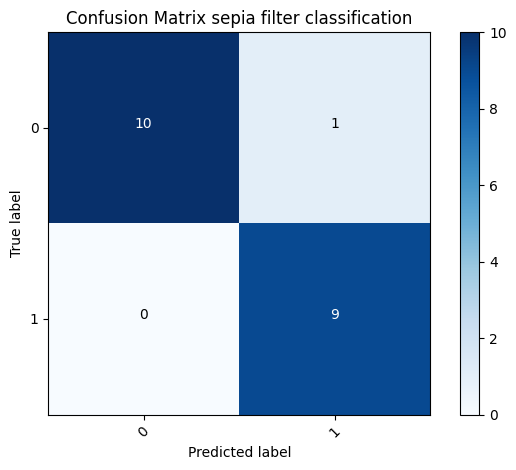

acc:  0.95
precision:  {0: 1.0, 1: 0.9}
recall:  {0: 0.9090909090909091, 1: 1.0}


In [104]:
print('ANN with Tool: ')
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

ANN without Tool: 


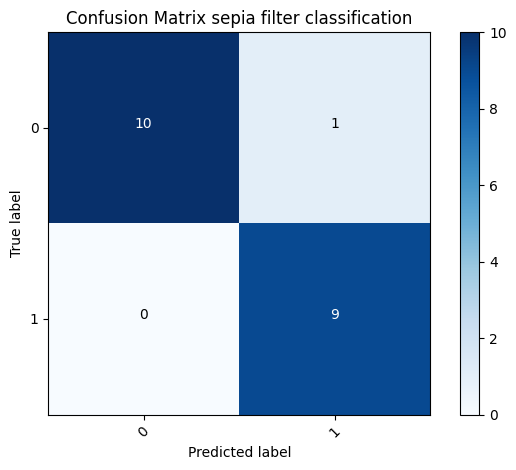

acc:  0.95
precision:  {0: 1.0, 1: 0.9}
recall:  {0: 0.9090909090909091, 1: 1.0}


In [105]:
print('ANN without Tool: ')
myAnnPredictedLabels = myAnnClassifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), myAnnPredictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

CNN without Tool: 


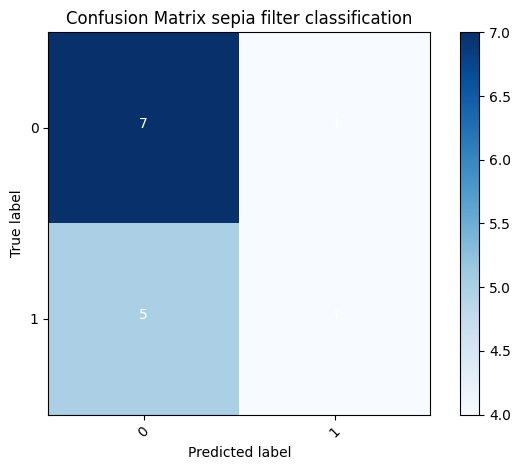

acc:  0.55
precision:  {0: 0.5833333333333334, 1: 0.5}
recall:  {0: 0.6363636363636364, 1: 0.4444444444444444}


In [111]:
print('CNN without Tool: ')
myCnnPredictedLabels = myCnnClassifier.predict(testInputsNormalisedCnn)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), myCnnPredictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

In [107]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.75759272
Iteration 2, loss = 0.25918158
Iteration 3, loss = 0.44044480
Iteration 4, loss = 0.46673256
Iteration 5, loss = 0.00132394
Iteration 6, loss = 0.00125209
Iteration 7, loss = 0.00100890
Iteration 8, loss = 0.00077164
Iteration 9, loss = 0.00062220
Iteration 10, loss = 0.00056148
Iteration 11, loss = 0.00055421
Iteration 12, loss = 0.00056270
Iteration 13, loss = 0.00055542
Iteration 14, loss = 0.00051847
Iteration 15, loss = 0.00045717
Iteration 16, loss = 0.00038666
Iteration 17, loss = 0.00031995
Iteration 18, loss = 0.00026373
Iteration 19, loss = 0.00021938
Iteration 20, loss = 0.00018565
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

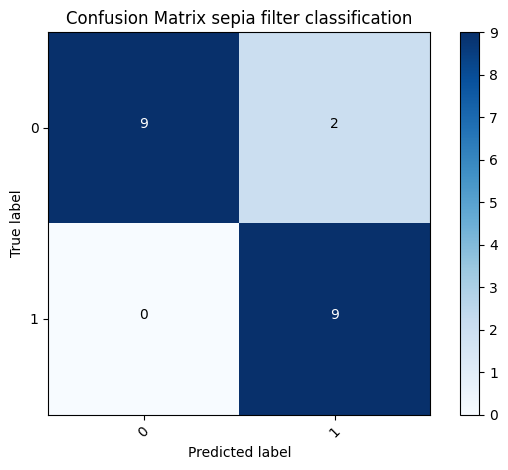

acc:  0.9
precision:  {0: 1.0, 1: 0.8181818181818182}
recall:  {0: 0.8181818181818182, 1: 1.0}


In [108]:
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

In [109]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='tanh', max_iter=100, solver='adam', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70140918
Iteration 2, loss = 0.35925982
Iteration 3, loss = 0.31889888
Iteration 4, loss = 0.28069374
Iteration 5, loss = 0.25574750
Iteration 6, loss = 0.23675168
Iteration 7, loss = 0.21223752
Iteration 8, loss = 0.19105339
Iteration 9, loss = 0.16599475
Iteration 10, loss = 0.15451952
Iteration 11, loss = 0.14898279
Iteration 12, loss = 0.14459110
Iteration 13, loss = 0.14059088
Iteration 14, loss = 0.13918077
Iteration 15, loss = 0.13812853
Iteration 16, loss = 0.13753855
Iteration 17, loss = 0.13591945
Iteration 18, loss = 0.13458828
Iteration 19, loss = 0.13307945
Iteration 20, loss = 0.12978615
Iteration 21, loss = 0.12691100
Iteration 22, loss = 0.12483338
Iteration 23, loss = 0.12249363
Iteration 24, loss = 0.11930163
Iteration 25, loss = 0.11638129
Iteration 26, loss = 0.11305725
Iteration 27, loss = 0.11010565
Iteration 28, loss = 0.10730916
Iteration 29, loss = 0.10467423
Iteration 30, loss = 0.10254156
Iteration 31, loss = 0.10061127
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate_init=0.01, max_iter=100, random_state=1,
              verbose=10)

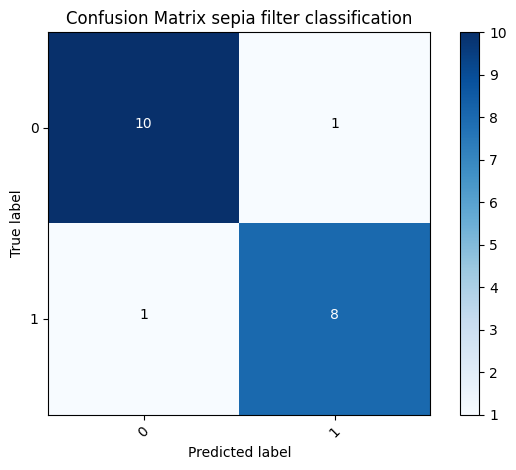

acc:  0.9
precision:  {0: 0.9090909090909091, 1: 0.8888888888888888}
recall:  {0: 0.9090909090909091, 1: 0.8888888888888888}


In [110]:
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)